In [6]:
%cd ..
from common.helpers import Helpers
%cd ./Task1

c:\Users\isaac\repos\MSDA\d208
c:\Users\isaac\repos\MSDA\d208\Task1


c:\Users\isaac\AppData\Local\pypoetry\Cache\virtualenvs\d208-3DHpwvHo-py3.11\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', None)

df = pd.read_csv('../Data/churn_clean.csv')

In [8]:
target_for_analysis = 'Churn'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = {'Population','Children','Age','Income','Churn','Outage_sec_perweek' ,'Email','Contacts','Yearly_equip_failure','Techie','Contract',
            'Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
            'PaymentMethod','MonthlyCharge','Bandwidth_GB_Year','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'}


yes_no_columns = ['Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                  'PaymentMethod', 'Churn']
categorical_columns = ['Marital', 'Gender', 'Area', 'InternetService']

columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Job']

categoricals = yes_no_columns + categorical_columns

features = list(df.columns)

for value in yes_no_columns:
    if value in columns:
        columns.remove(value)


for value in categorical_columns:
    if value in columns:
        columns.remove(value)

# Transform yes and no values to 1 column of 1 or 0 respectively
for column in yes_no_columns:
    df[column] = df[column].apply(Helpers.transform_yes_no_to_bit)

# One hot encode the remaining columns
for column in categorical_columns:
    values = Helpers.get_values(df=df, column=column)
    categoricals.remove(column)
    categoricals = categoricals + values
    df = Helpers.one_hot_encode(df=df, column=column)


# Drop columns that cannot be transformed to numeric values
for column in columns_to_drop:
    features.remove(column)
df = df.drop(columns=columns_to_drop, axis=1)

# Repopulate feature list with 1 Hot column names
features = list(df.columns)

# Convert all data types to numeric
for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors="coerce")

# Drop columns that have values that won't convert
df = df.dropna(axis=1)

# Remove the target value from the possible feature lise
features.remove(target_for_analysis)

# Repopulate feature list after columns have been dropped
features = list(df.columns)
df.replace({False: 0, True: 1}, inplace=True)
# Create Exog and Endog data frames
X = df[features]
y = df[target_for_analysis]
df.to_csv('prepared_data.csv', index=False)

C:\Users\isaac\AppData\Local\Temp\ipykernel_3112\1789741148.py:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [10]:
df[[target_for_analysis]].describe()

,Churn
count,10000.000000
mean,0.265000
std,0.441355
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Divorced,Married,Never Married,Separated,Widowed,Female,Male,Nonbinary,Rural,Suburban,Urban,DSL,Fiber Optic
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.0,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,0.0,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.209200,0.191100,0.195600,0.201400,0.202700,0.502500,0.474400,0.023100,0.332700,0.334600,0.332700,0.346300,0.440800
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.0,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.0,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.406758,0.393187,0.396682,0.401066,0.402031,0.500019,0.499369,0.150229,0.471204,0.471874,0.471204,0.475814,0.496508
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,23.000000,7.00

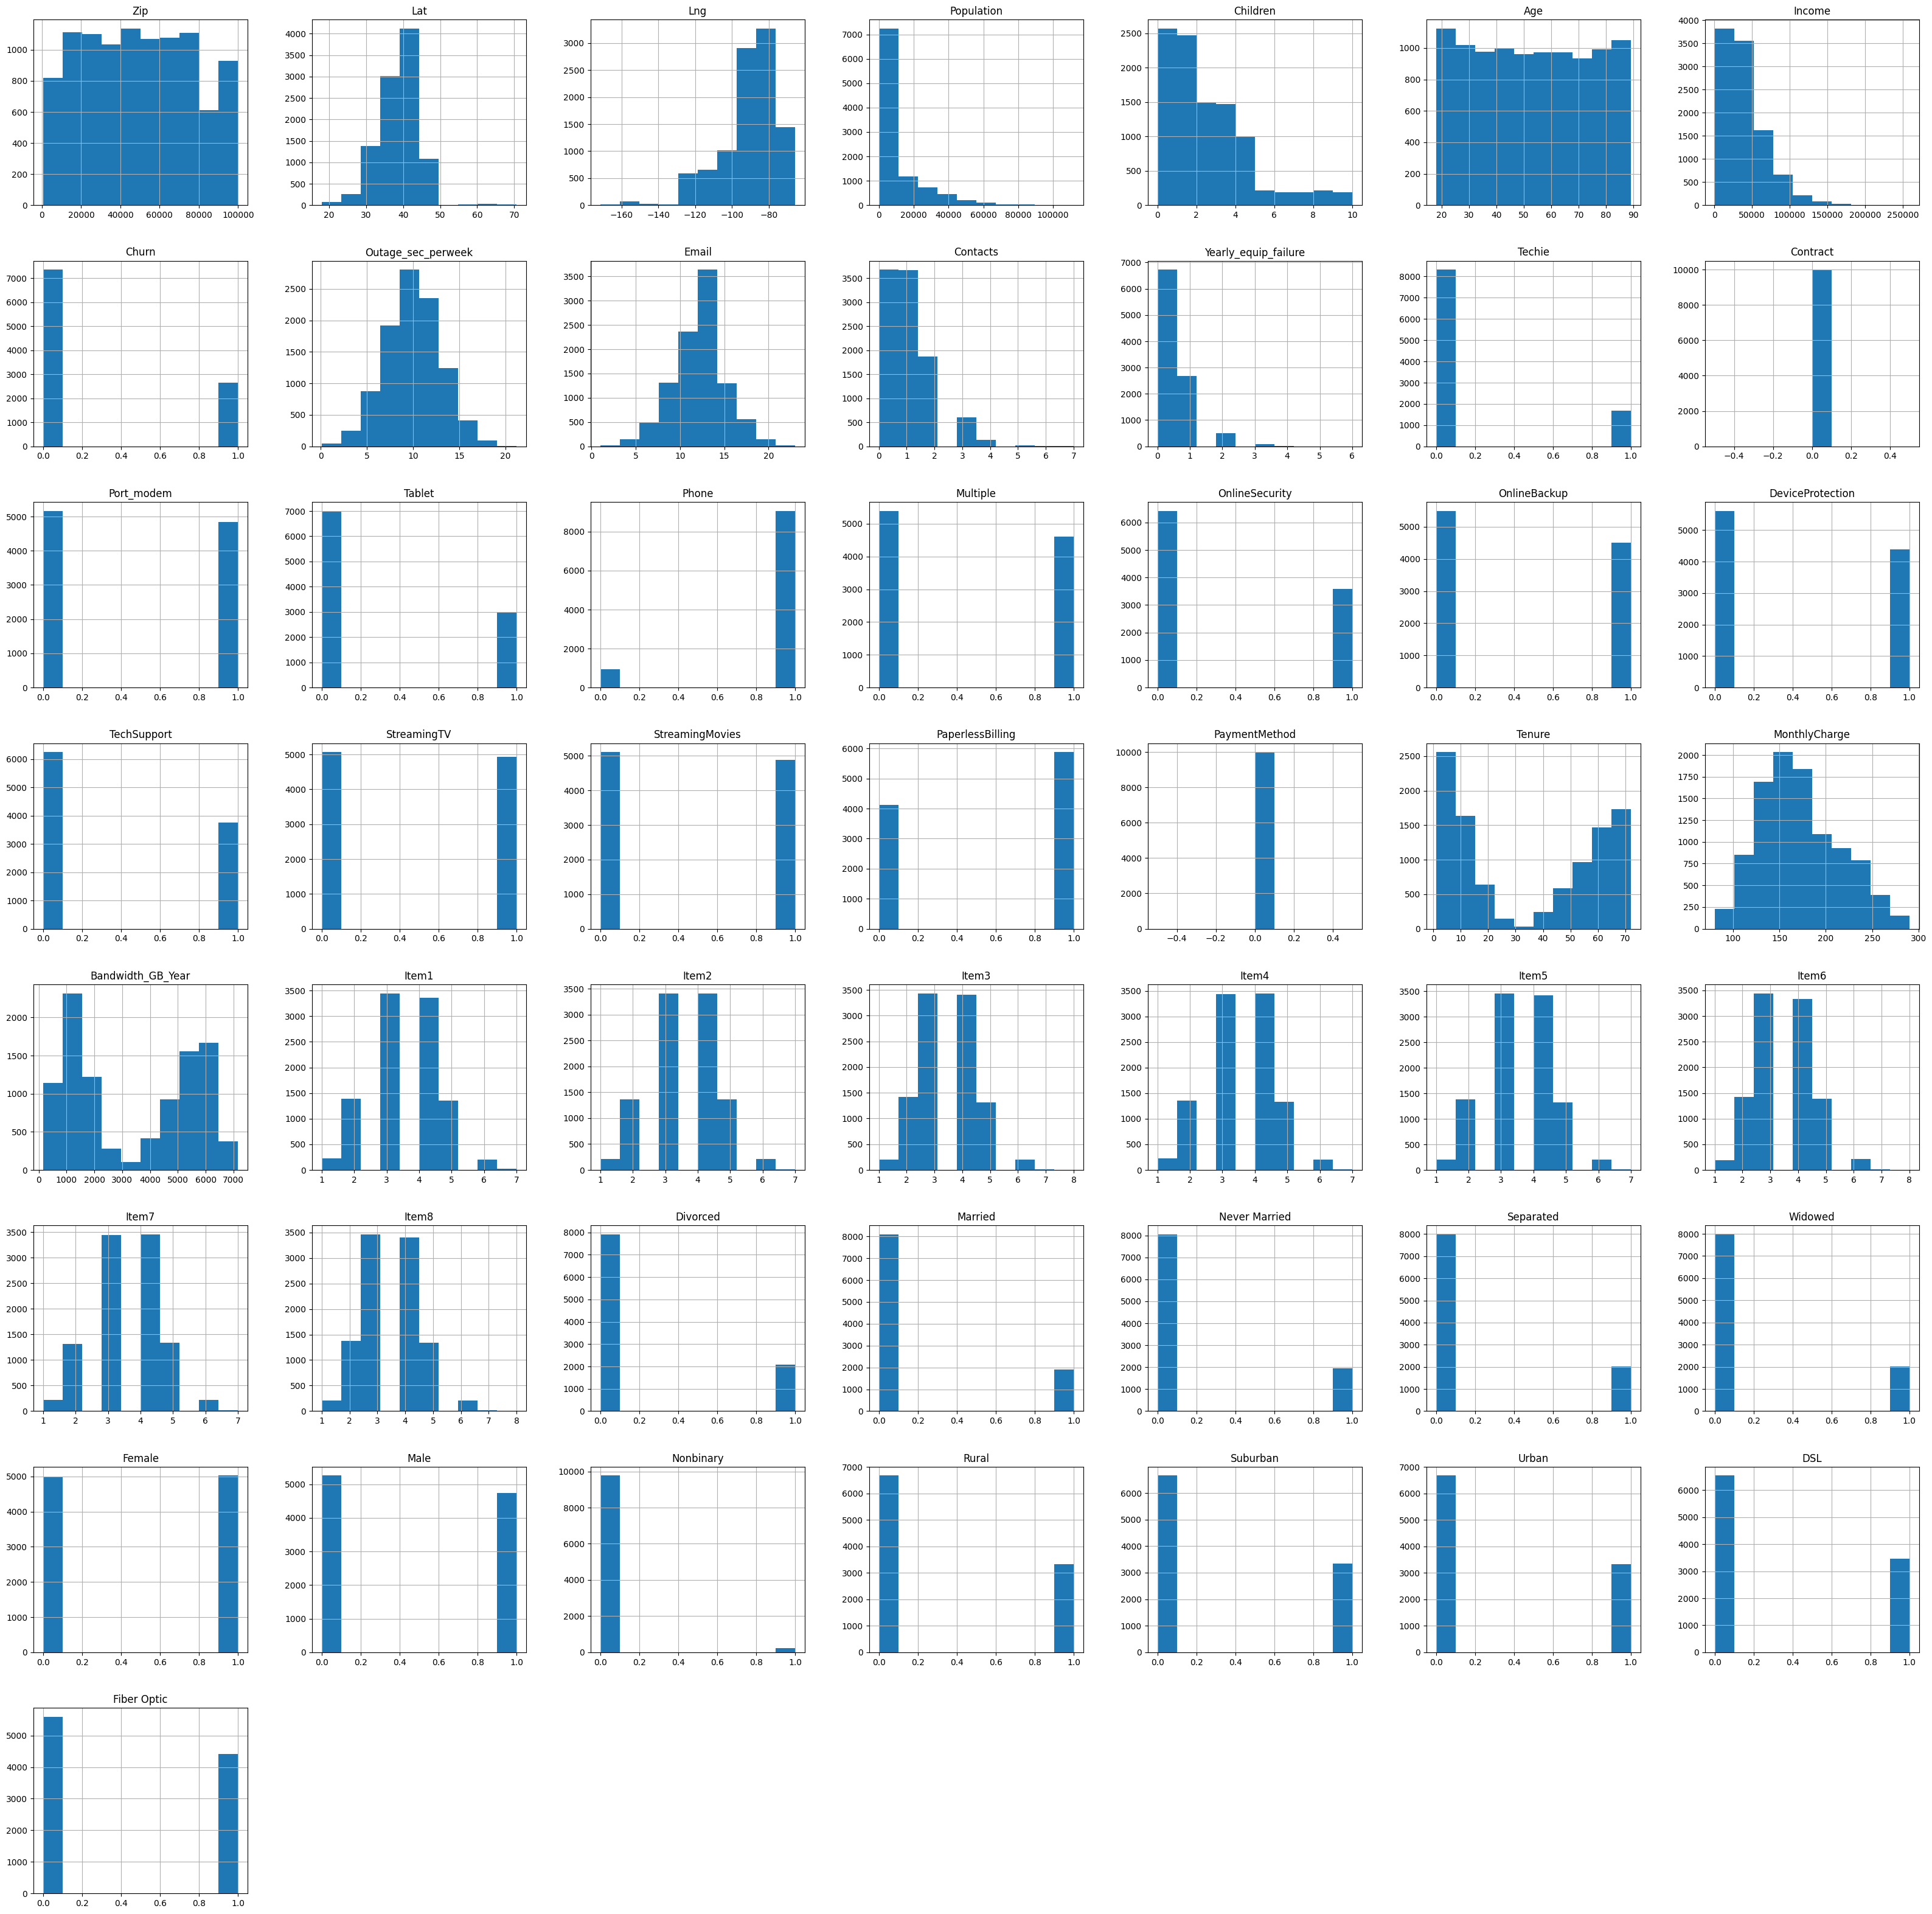

In [13]:
df.hist(figsize=(40,40))
plt.show()

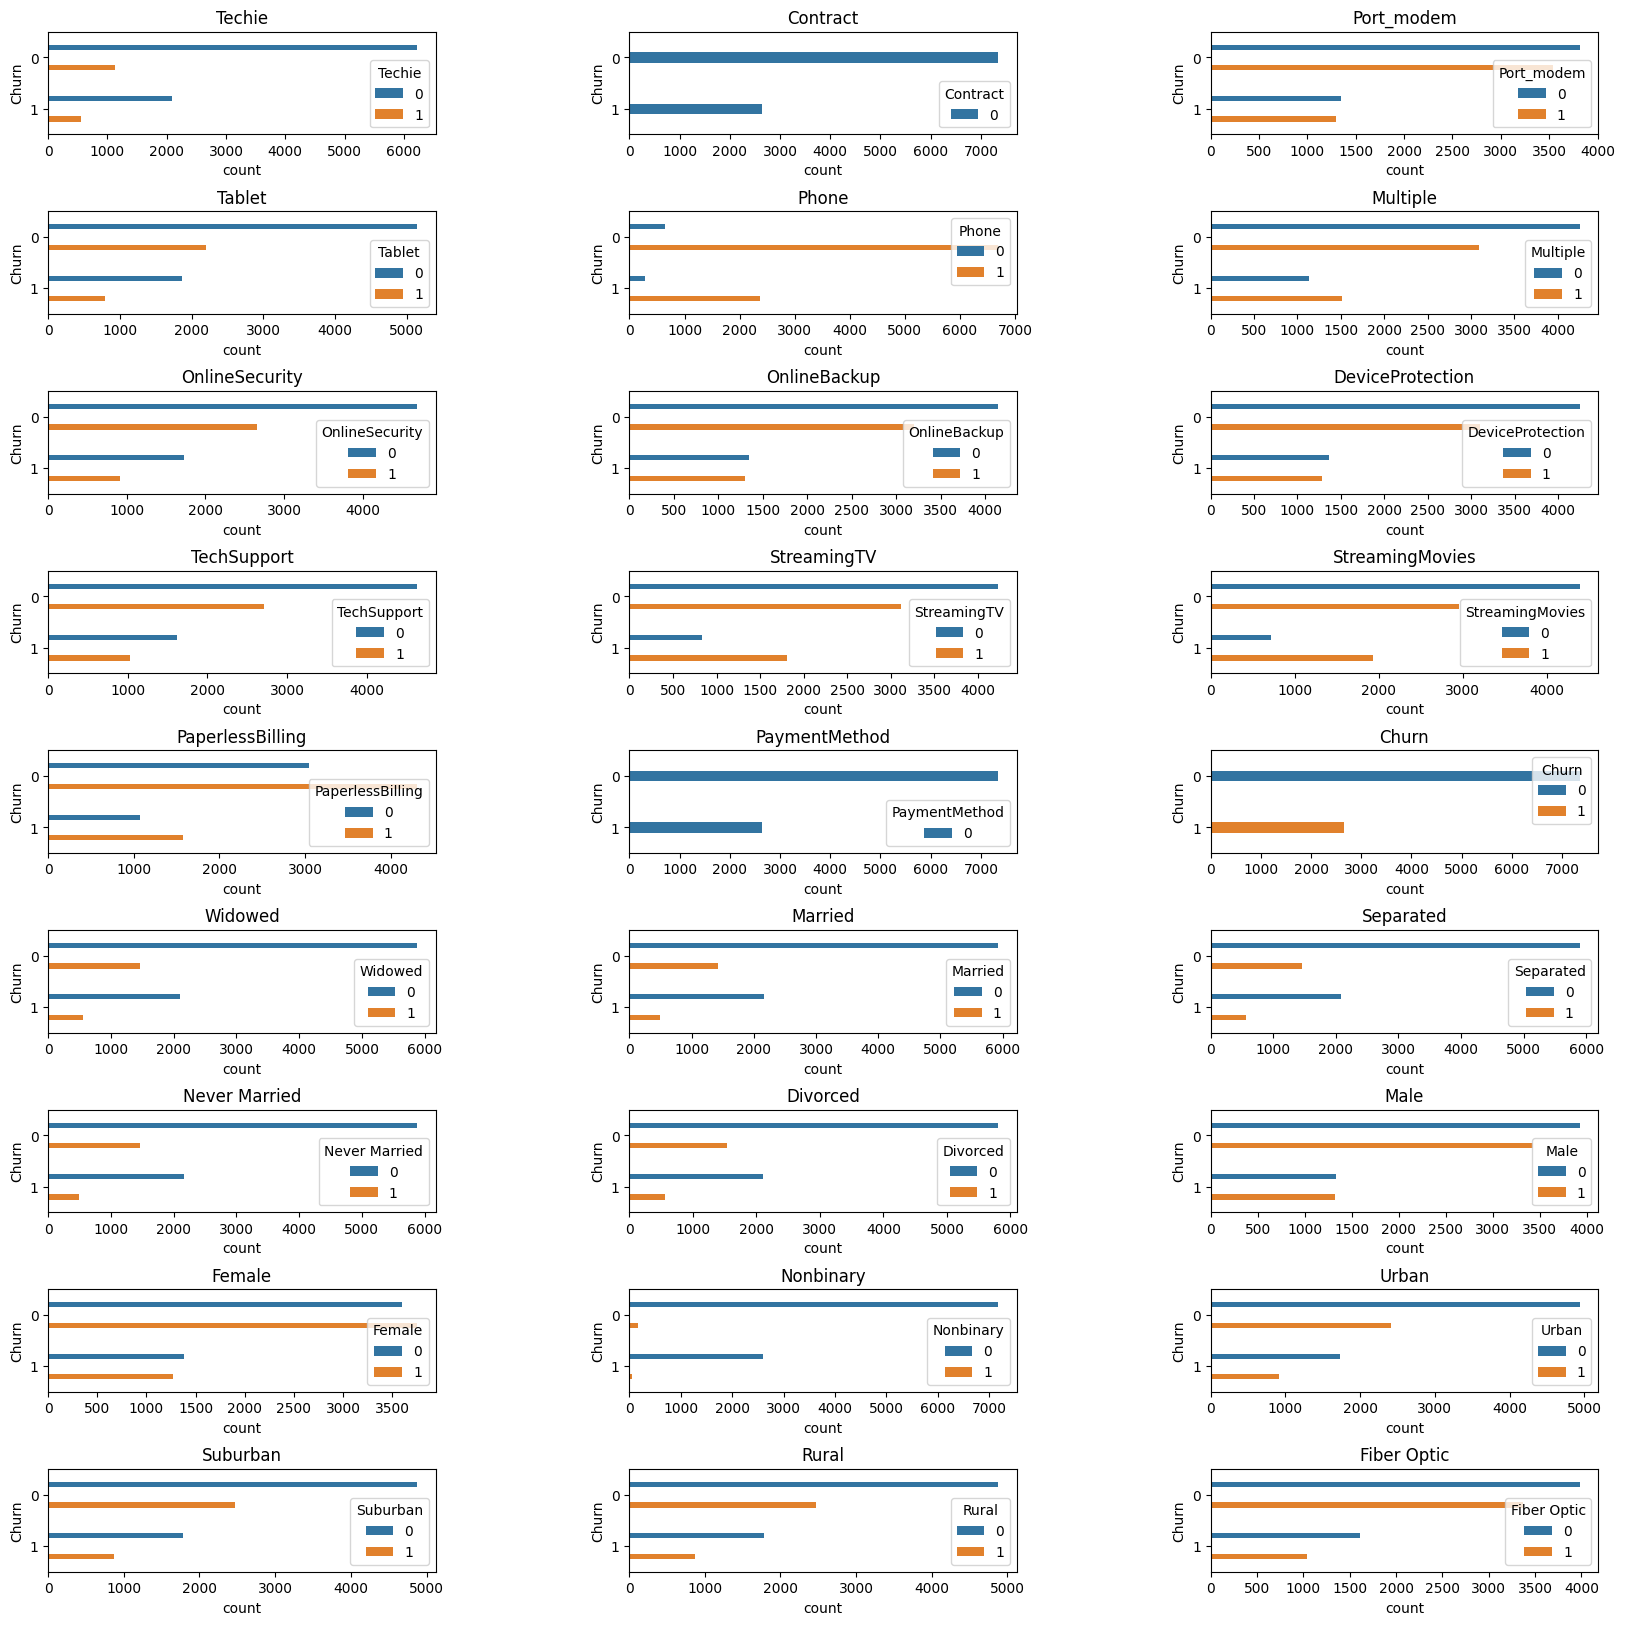

In [18]:
import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(categoricals) // column_count, column_count, figsize=(20, 20))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
            plt.subplots_adjust(wspace=0.5, hspace=0.75)
            sns.countplot(data = df, y=df[target_for_analysis], ax=sub_axis, hue=categoricals[i], gap=0.75).set(title=categoricals[i])
            i = i+1
plt.show()

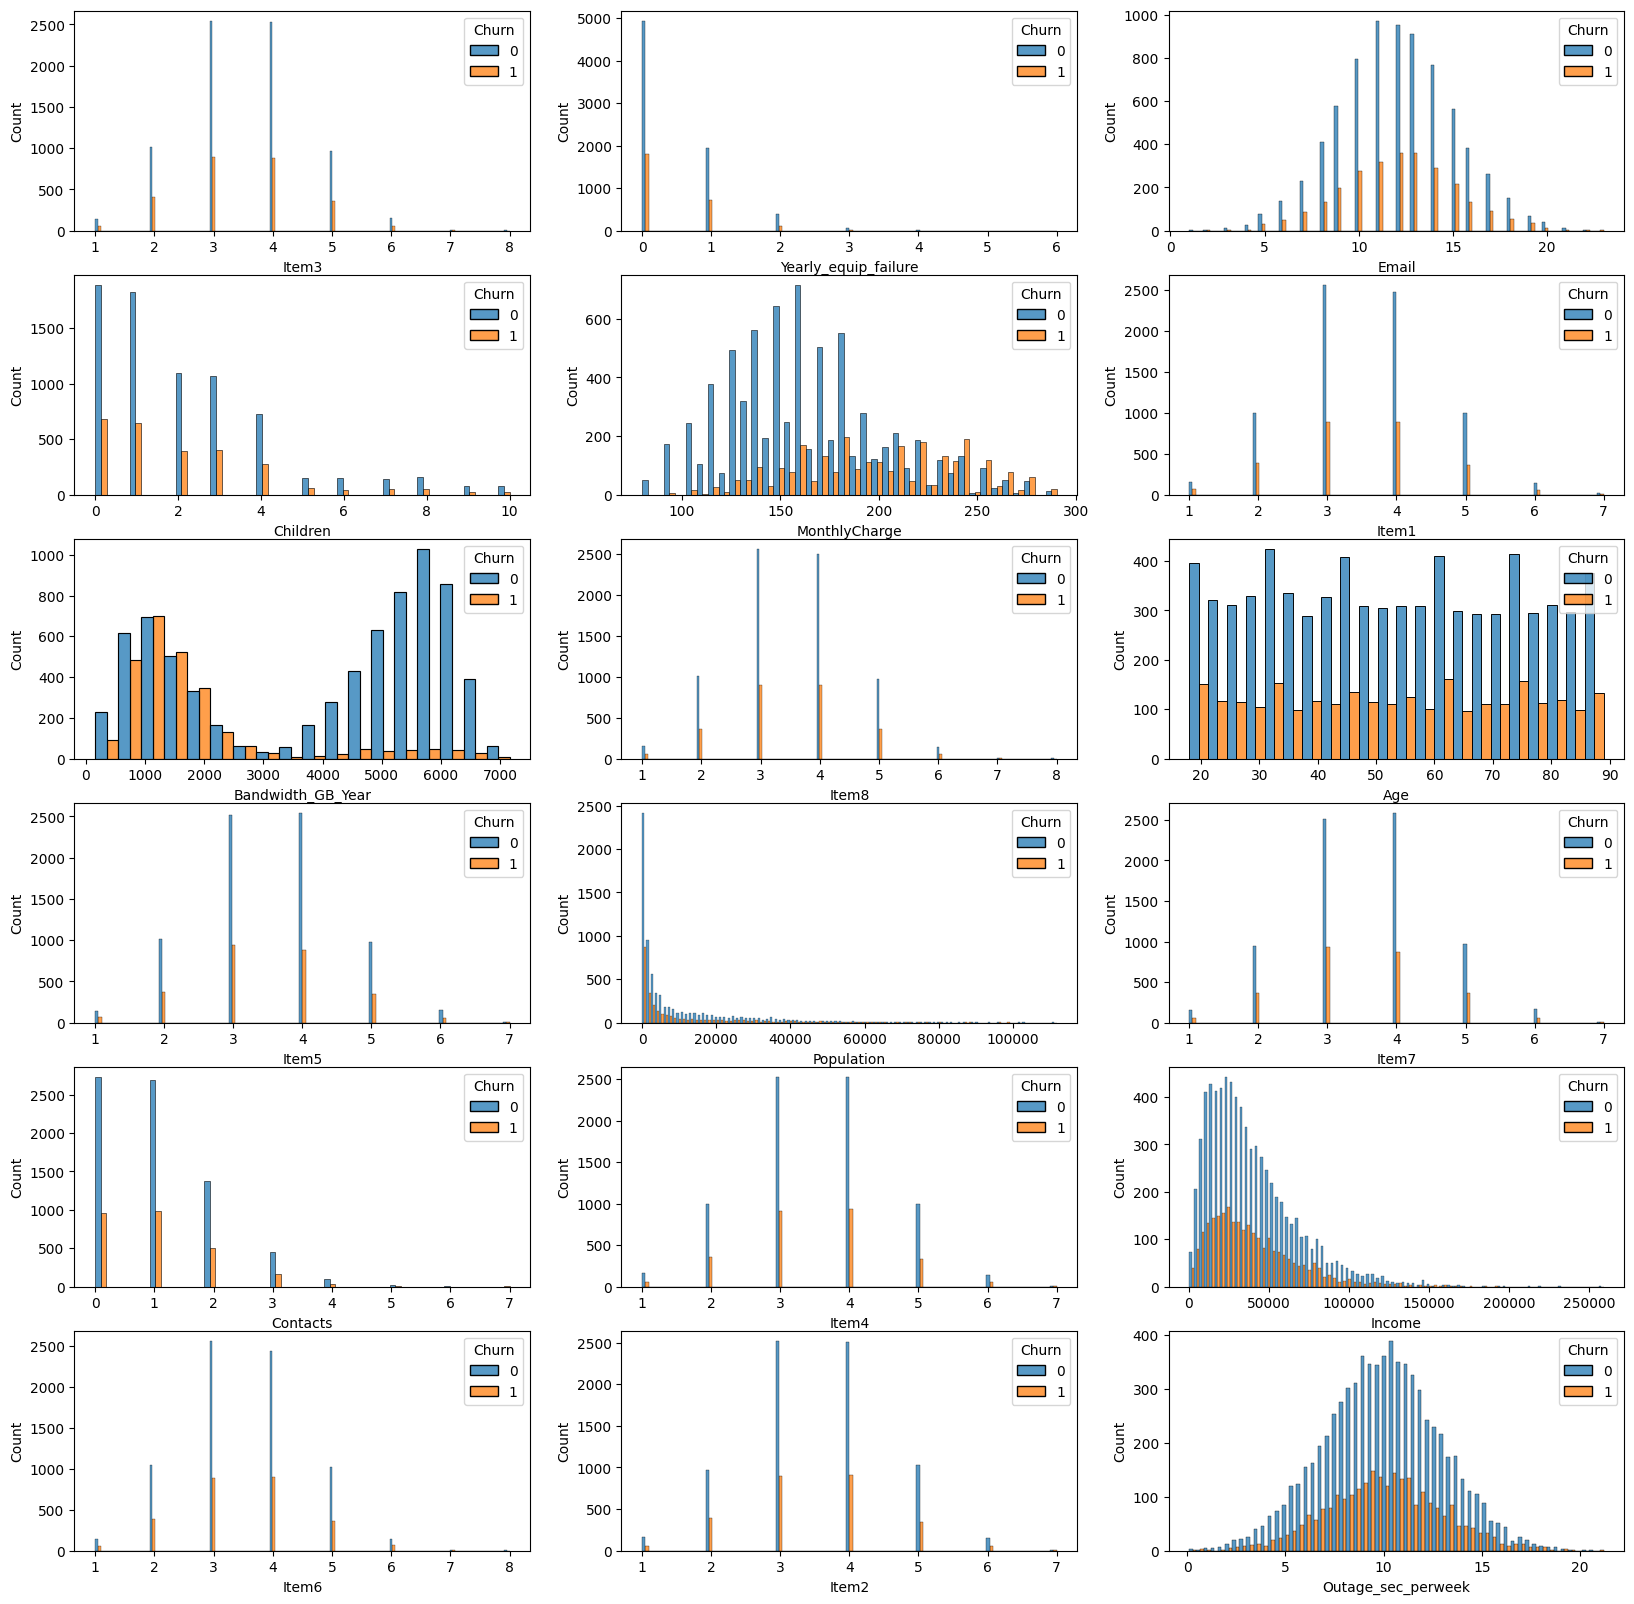

In [19]:
import matplotlib.pyplot as plt
column_count = 3
fig, axis = plt.subplots(len(columns) // column_count, column_count, figsize=(20, 20))
i = 0
len_axis = len(axis)
for triaxis in axis:
    for sub_axis in triaxis:
            if list(columns)[i] not in categorical_columns:
                sns.histplot(data=df, multiple="dodge", x=list(columns)[i], hue=target_for_analysis, ax=sub_axis)
                i = i+1
plt.show()

In [32]:
import statsmodels.api as sm

endog= df[target_for_analysis]
exog = df[list(columns)]

model = sm.Logit(endog, exog)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.357548
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3816
Time:                        18:48:33   Log-Likelihood:                -3575.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4477      0.336    -13.232      0.000      -5.107      -3.789
Item3                 -0.0225      0.031     -0.718      0.473      -0.084       0.039
Email                  0.0023      0.010      0.236      0.813      -0.017       0.022
MonthlyCharge          0.0342      0.001     38.697      0.000       0.032       0.036
Bandwidth_GB_Year     -0.0008   1.97e-05    -41.481      0.000      -0.001      -0.001
Item8                  0.0002      0.031      0.006      0.995      -0.060       0.061
Age                   -0.0012      0.001     -0.862      0.389      -0.004       0.002
Item5                 -0.0388      0.034     -1.151      0.250      -0.105       0.027
Item7                 -0.0281      0.032     -0.867      0.386      -0.092       0.035
Item4                 -0.0392      0.032     -1.215      0.224      -0.103       0.024
Item6                 -0.0110      0.033     -0.330      0.741      -0.077       0.055
Outage_sec_perweek    -0.0021      0.010     -0.212      0.832      -0.022       0.017
======================================================================================
"""

## Reduce the features by P-Value

In [33]:
p_values = result.pvalues.copy()
p_values.sort_values(ascending=False, inplace=True)

In [34]:
print(p_values.iloc[0], p_values.keys()[0])

0.9949278078614308 Item8


In [36]:
alpha = 0.05

while (p_values.iloc[0] > alpha):
    columns.remove(p_values.keys()[0])
    endog= df[target_for_analysis]
    exog = df[list(columns)]
    model = sm.Logit(endog, exog)
    result = model.fit()
    p_values = result.pvalues.sort_values(ascending=False)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3654
Time:                        18:49:17   Log-Likelihood:                -3669.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Item3                 -0.0935      0.030     -3.092      0.002      -0.153      -0.034
Email                 -0.0460      0.009     -5.060      0.000      -0.064      -0.028
MonthlyCharge          0.0304      0.001     37.664      0.000       0.029       0.032
Bandwidth_GB_Year     -0.0008   1.93e-05    -42.052      0.000      -0.001      -0.001
Age                   -0.0058      0.001     -4.226      0.000      -0.009      -0.003
Item5                 -0.3033      0.027    -11.121      0.000      -0.357      -0.250
Item7                 -0.1317      0.031     -4.262      0.000      -0.192      -0.071
Item4                 -0.2280      0.029     -7.938      0.000      -0.284      -0.172
Item6                 -0.0991      0.032     -3.105      0.002      -0.162      -0.037
Outage_sec_perweek    -0.0451      0.009     -4.847      0.000      -0.063      -0.027
======================================================================================
"""

In [24]:
print(*columns)

Item3 Email MonthlyCharge Bandwidth_GB_Year Item8 Age Item5 Item7 Item4 Item6 Outage_sec_perweek


In [26]:
from sklearn.metrics import confusion_matrix

# Split the data into features and target
X = df[list(columns)]
y = df[target_for_analysis]

# Make predictions on the data
y_pred = result.predict(X)


y_pred_rounded = [round(x) for x in y_pred]

In [27]:

# Create the confusion matrix
cm = confusion_matrix(y, y_pred_rounded)

# Print the confusion matrix
print(cm)

[[6664  686]
 [1102 1548]]


In [29]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y,y_pred_rounded)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.8212


In [38]:
print(result.params[0])

-0.09352786097109504


C:\Users\isaac\AppData\Local\Temp\ipykernel_3112\2012597622.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(result.params[0])


In [40]:
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

In [44]:
print(dir(result.model))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_kwargs', '_check_perfect_pred', '_check_rank', '_continuous_ok', '_data_attr', '_deriv_mean_dparams', '_deriv_score_obs_dendog', '_derivative_exog', '_derivative_exog_helper', '_derivative_predict', '_fit_collinear', '_fit_zeros', '_formula_max_endog', '_get_init_kwds', '_handle_data', '_init_keys', '_kwargs_allowed', 'cdf', 'cov_params_func_l1', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'family', 'fit', 'fit_constrained', 'fit_regularized', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'k_extra', 'link', 'loglike', 'loglikeobs

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3654
Time:                        18:58:58   Log-Likelihood:                -3669.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Item3                 -0.0935      0.030     -3.092      0.002      -0.153      -0.034
Email                 -0.0460      0.009     -5.060      0.000      -0.064      -0.028
MonthlyCharge          0.0304      0.001     37.664      0.000       0.029       0.032
Bandwidth_GB_Year     -0.0008   1.93e-05    -42.052      0.000      -0.001      -0.001
Age                   -0.0058      0.001     -4.226      0.000      -0.009      -0.003
Item5                 -0.3033      0.027    -11.121      0.000      -0.357      -0.250
Item7                 -0.1317      0.031     -4.262      0.000      -0.192      -0.071
Item4                 -0.2280      0.029     -7.938      0.000      -0.284      -0.172
Item6                 -0.0991      0.032     -3.105      0.002      -0.162      -0.037
Outage_sec_perweek    -0.0451      0.009     -4.847      0.000      -0.063      -0.027
======================================================================================
"""